# Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)

In [19]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

data = load_boston()

X, y = data['data'], data['target']

X.shape, y.shape

((506, 13), (506,))

In [2]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
# reg.fit(X_train, y_train)
# reg.score(X_test, y_test)
param_grid = {'n_estimators': [i for i in range(5, 101, 5)]}
param_grid

{'n_estimators': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100]}

n_estimators: 5. score: 0.7539646219304528
n_estimators: 10. score: 0.8080152308687957
n_estimators: 15. score: 0.8394454646924571
n_estimators: 20. score: 0.8555922354102387
n_estimators: 25. score: 0.858045434199992
n_estimators: 30. score: 0.8601149382825128
n_estimators: 35. score: 0.8601939931828244
n_estimators: 40. score: 0.861135545395591
n_estimators: 45. score: 0.8599278126554492
n_estimators: 50. score: 0.8632238708223497
n_estimators: 55. score: 0.8629254303005464
n_estimators: 60. score: 0.8629657159045454
n_estimators: 65. score: 0.8624977260354488
n_estimators: 70. score: 0.861322857060915
n_estimators: 75. score: 0.8595275271909678
n_estimators: 80. score: 0.8602291243285458
n_estimators: 85. score: 0.8587472689052463
n_estimators: 90. score: 0.85567122825344
n_estimators: 95. score: 0.8580728964272628
n_estimators: 100. score: 0.8596792855244546
max_score: 0.8632238708223497


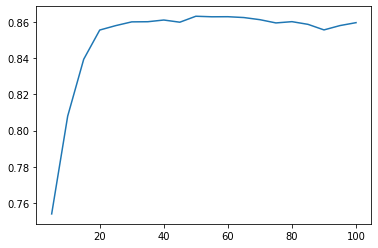

In [36]:
x_plot = [i for i in range(5, 101, 5)]
y_plot = []
max_score = 0

for i in x_plot:
    reg = RandomForestRegressor(n_estimators=i, random_state=42)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print('n_estimators: {}. score: {}'.format(i, score))
    if score > max_score:
        max_score = score
    y_plot.append(score)

print('max_score:', max_score)
plt.plot(x_plot, y_plot)

In [39]:
from sklearn.linear_model import LinearRegression

max_score = 0

for fit_intercept in [False, True]:
    for normalize in [False, True]:
        reg = LinearRegression(fit_intercept=fit_intercept, normalize=normalize)
        reg.fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        print('fit_intercept: {}, normalize: {}. score: {}'.format(fit_intercept, normalize, score))
        if score > max_score:
            max_score = score

print('max_score:', max_score)

fit_intercept: False, normalize: False. score: 0.6881037280185591
fit_intercept: False, normalize: True. score: 0.6881037280185591
fit_intercept: True, normalize: False. score: 0.7261570836552481
fit_intercept: True, normalize: True. score: 0.7261570836552477
max_score: 0.7261570836552481
